<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Iris.csv')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
data = data.drop(['Id'],axis=1)
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

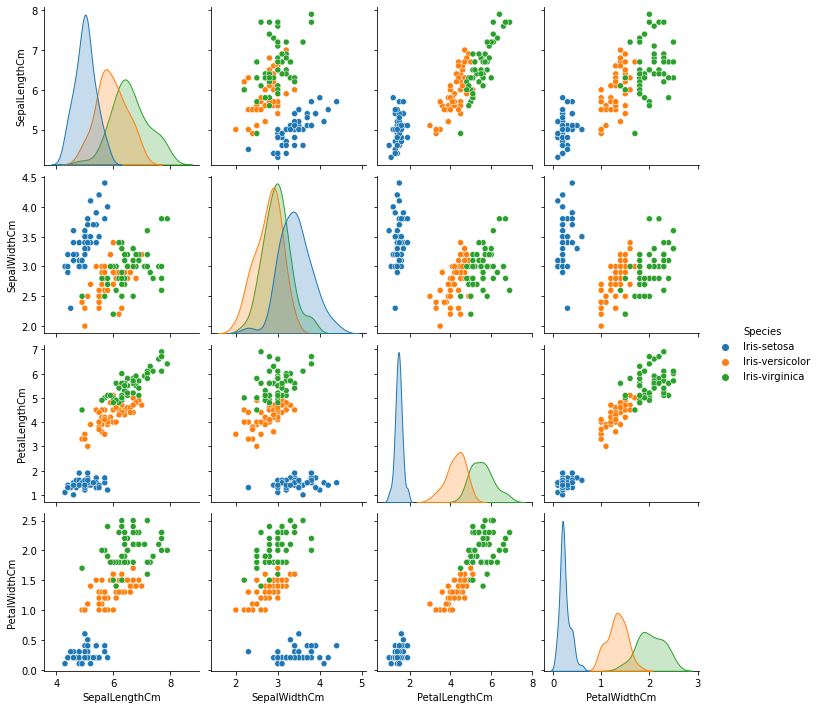

In [ ]:
sns.pairplot(data,hue='Species')
plt.show()

In [ ]:
data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [ ]:
features = data.iloc[:,0:-1].values
target = data.iloc[:,-1].values

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
clusters = kmeans.fit_predict(features)
kmeans.cluster_centers_.shape

(3, 4)

In [41]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters==i)
    labels[mask] = mode(target[mask])[0]
    print(mask)
    print(labels[mask])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False False False  True False
 False False False False False  True  True False False False False  True
 False  True False  True False False  True  True False False False False
 False  True False False False False  True False False False  True False
 False False  True False False  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

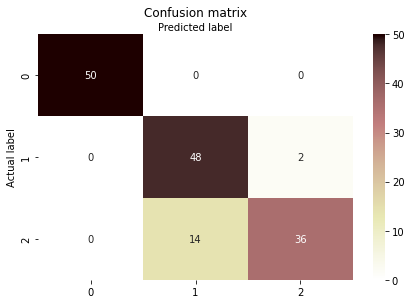

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cnf_mat = confusion_matrix(target,labels)
fig, ax = plt.subplots()
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_mat),annot=True,cmap='pink_r')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')
plt.show()

In [44]:
accuracy_score(target,labels)

0.8933333333333333

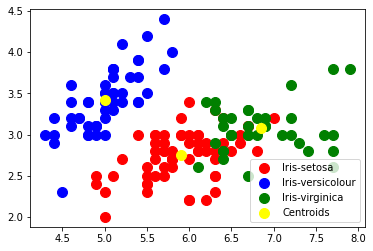

In [47]:
plt.scatter(features[clusters==0,0],features[clusters==0,1],s=100,c ='red',label = 'Iris-setosa')
plt.scatter(features[clusters==1,0],features[clusters==1,1],s=100,c ='blue',label = 'Iris-versicolour')
plt.scatter(features[clusters==2,0],features[clusters==2,1],s=100,c ='green',label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c ='yellow',label = 'Centroids')
plt.legend()
plt.show()